import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage as skim
from skimage import io
from skimage.util import crop
import matplotlib.image as mpimg

definition function

In [2]:
def thresholding(thresh,img):
    nrow, ncol, ncolor  = img.shape
    new_img = img.copy()
    for i in range(nrow):
        for j in range(ncol):
            if(img[i,j][0]>thresh and img[i,j][1]>thresh and img[i,j][2]>thresh ):
                new_img[i,j] = [255,255,255]
    # plt.imshow(new_img)
    return new_img

In [3]:
def thresholding_2value(min_th,max_th,img):
    nrow, ncol, ncolor  = img.shape
    new_img = img.copy()
    for i in range(nrow):
        for j in range(ncol):
            if(img[i,j][0]>max_th and img[i,j][1]>max_th and img[i,j][2]>max_th ):
                new_img[i,j] = [255,255,255]
            if(img[i,j][0]<min_th and img[i,j][1]<min_th and img[i,j][2]<min_th ):
                new_img[i,j] = [255,255,255]
    # plt.imshow(new_img)
    return new_img

In [4]:
def find_length(img,position = True): #input must thresholding before
    nrow, ncol, ncolor  = img.shape
    right_position = []
    left_position = []
    #find all left side
    temp1 = []
    for i in range(nrow):
        for j in range(ncol):
            if(img[i,j][0] < 255 ):
                temp1.append((i,j))
                break
    #find true left side
    temp2 = []
    for i in range(len(temp1)):
        temp2.append(temp1[i][1])
    min_col = np.min(temp2)
    #find center true left side
    temp3 = []
    for i in range(nrow):
        if(img[i,min_col][0] < 255 ):
            temp3.append(i)
    if(len(temp3) == 1):
        min_row = temp3[0]
    elif(len(temp3)%2 == 0):
        min_row = temp3[int(len(temp3)/2)]
    else:
        min_row = temp3[int(len(temp3)/2) + 1]
    left_position = [min_row,min_col]
    # print(left_position)

    #find all right side
    temp1 = []
    for i in range(nrow):
        for j in range(ncol):
            i_inverse = (nrow-1) - i
            j_inverse = (ncol-1) - j
            if(img[i_inverse,j_inverse][0] < 255 ):
                temp1.append((i_inverse,j_inverse))
                break
    #find true right side
    temp2 = []
    for i in range(len(temp1)):
        temp2.append(temp1[i][1])
    max_col = np.max(temp2)
    #find center true right side
    temp3 = []
    for i in range(nrow):
        if(img[i,max_col][0] < 255 ):
            temp3.append(i)
    if(len(temp3) == 1):
        min_row = temp3[0]
    elif(len(temp3)%2 == 0):
        min_row = temp3[int(len(temp3)/2)]
    else:
        min_row = temp3[int(len(temp3)/2) + 1]
    right_position = [min_row,max_col]
    if(position == True):
        print(left_position)
        print(right_position)

    #find length with pythagoras theorem
    base = np.abs(right_position[1] - left_position[1])
    perp = np.abs(left_position[0] - right_position[0])
    length = np.hypot(base, perp)
    # print("length of picture is " , length , str("pixel"))
    return length
    

In [5]:
def plot_compare_img(img1,img2):
    plt.figure(figsize=(20,10))
    plt.subplot(121), plt.imshow(img1), plt.axis('off') 
    plt.subplot(122), plt.imshow(img2), plt.axis('off') 
    plt.show()  

In [6]:
def plot_histogram(img):
    _ = plt.hist(img.ravel(), bins = 256, color = 'orange', )
    _ = plt.hist(img[:, :, 0].ravel(), bins = 256, color = 'red', alpha = 0.5)
    _ = plt.hist(img[:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 0.5)
    _ = plt.hist(img[:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5)
    _ = plt.xlabel('Intensity Value')
    _ = plt.ylabel('Count')
    _ = plt.legend(['Total', 'Red_Channel', 'Green_Channel', 'Blue_Channel'])
    plt.show()

In [23]:
def pixel_to_cm(pixel):
    return (pixel*0.5)/53

make measure image

In [9]:
def_img = io.imread("image\\10.08.2020 Heptane-water\\frame 2\\12-06-06 PM\\10.08.2020 (2) 0337.jpg", as_gray=False)
def_img.shape

(1080, 1920, 3)

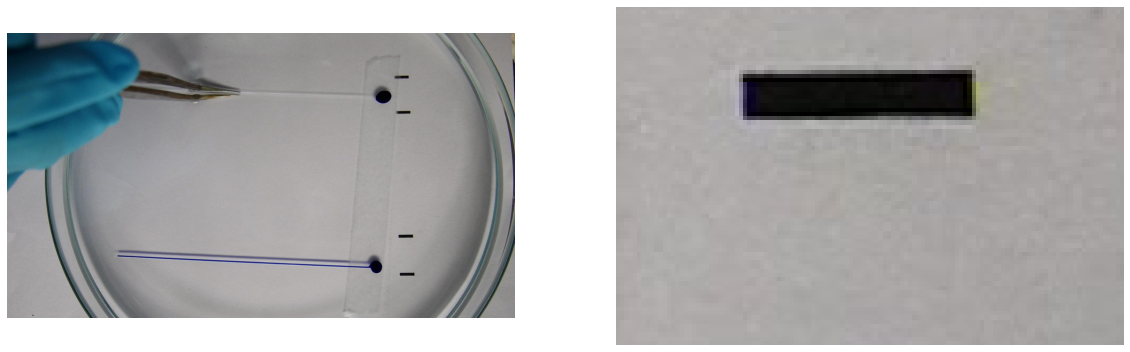

In [20]:
measure_im = crop(def_img, ((750, 250), (1450, 350), (0,0)), copy=False)
# print(def_img.shape, measure_im.shape)
plot_compare_img(def_img,measure_im)

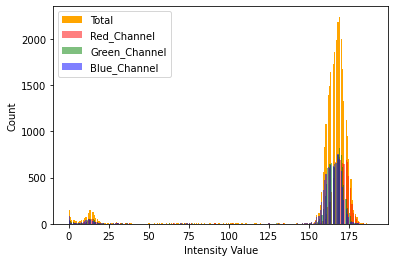

In [21]:
plot_histogram(measure_im)

[22, 30]
[21, 83]


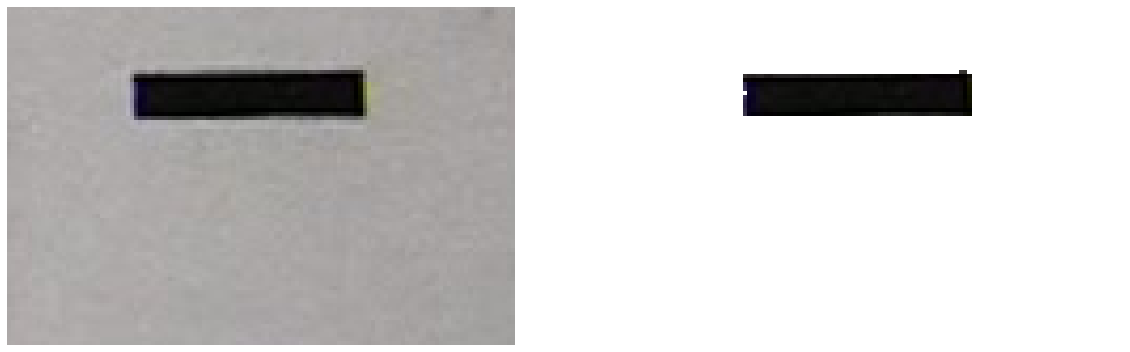

length of picture is  53.009433122794285 pixel


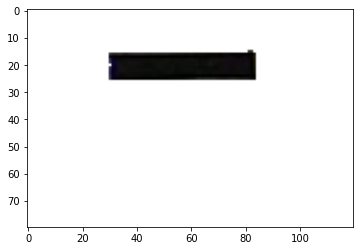

In [22]:
thresh_measure_im = thresholding(50,measure_im)
l = find_length(thresh_measure_im)
plot_compare_img(measure_im,thresh_measure_im)
plt.imshow(thresh_measure_im)
print("length of picture is " , l , str("pixel"))

53 pixel = 0.5 cm

x pixel = y cm


y cm = (x pixel* 0.5) / 53


find definition length on 3571 picture

(1080, 1920, 3) (180, 570, 3)


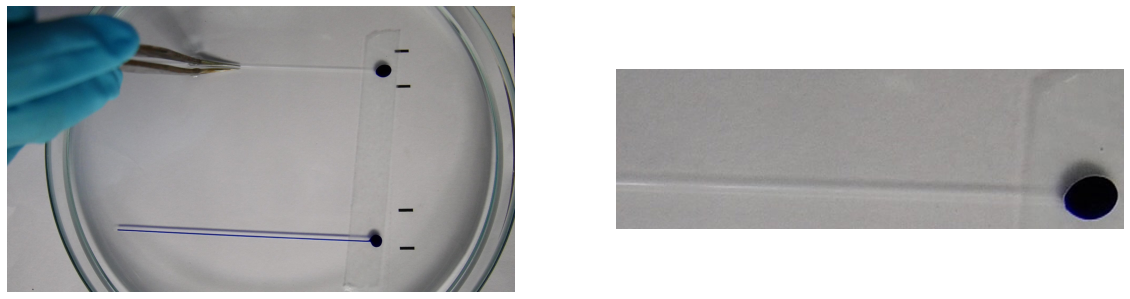

In [33]:
def_crop_im = crop(def_img, ((100, 800), (890, 460), (0,0)), copy=False)
print(def_img.shape, def_crop_im.shape)
plot_compare_img(def_img,def_crop_im)

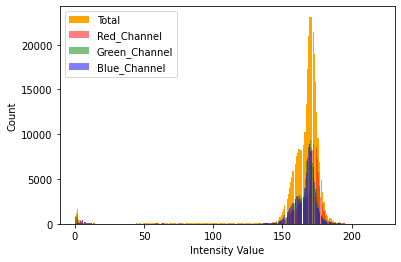

In [13]:
plot_histogram(def_crop_im)

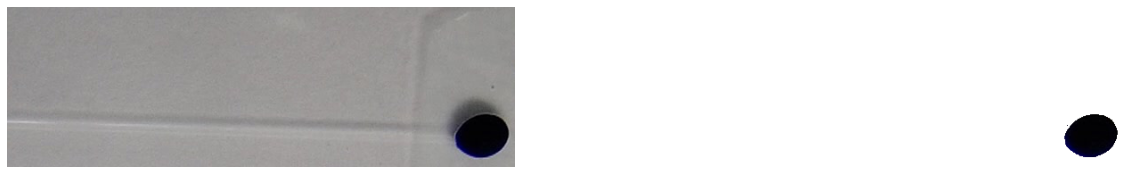

In [34]:
Tdef_img2 = thresholding(45,def_crop_im)
plot_compare_img(def_crop_im,Tdef_img2)


[147, 503]
[142, 562]
ldef  59.21148537234985 pixel


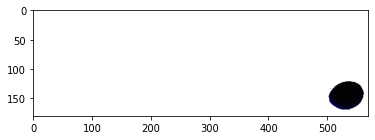

In [35]:
ldef = find_length(Tdef_img2)
plt.imshow(Tdef_img2)
print("ldef " , ldef , str("pixel"))

find length on crop value 1 from 0337 to 0434

In [40]:
number_of_picture = 337
thresh = 45
template1 = []
l_def = 59.21148537234985
#434-337 = 97
for i in range(98):
    if(True) :   
        image = mpimg.imread( "image\\10.08.2020 Heptane-water\\frame 2\\12-06-06 PM\\10.08.2020 (2) " + str(number_of_picture + i).zfill(4) + ".jpg" )
        crop_image = crop(image, ((100, 800), (890, 460), (0,0)), copy=False)
        thresh_image = thresholding(thresh,crop_image)
        # plot_compare_img(crop_image,thresh_image)
        length = find_length(thresh_image,False)
        length = length - l_def
        length = int(length)
        if(length > 300):
            thresh_image = thresholding(30,crop_image)
            length = find_length(thresh_image,False)
            length = length - l_def
            length = int(length)
        template1.append(length)
        # print(i, length)
        # plt.figure()
        # plt.imshow(thresh_image)

In [41]:
print(template1)
print(len(template1))

[0, 0, 0, 2, 2, 4, 4, 3, 5, 4, 4, 4, 5, 5, 5, 6, 7, 503, 503, 8, 9, 505, 13, 16, 20, 21, 22, 24, 25, 27, 29, 31, 33, 35, 37, 39, 39, 44, 46, 48, 48, 52, 55, 56, 58, 60, 61, 63, 65, 68, 72, 73, 75, 78, 80, 81, 86, 89, 91, 92, 95, 99, 102, 105, 108, 113, 115, 117, 122, 125, 129, 132, 136, 139, 143, 147, 152, 156, 160, 164, 168, 172, 176, 179, 184, 188, 193, 197, 202, 206, 210, 215, 220, 224, 229, 233, 238, 242]
98


find length on crop value 2 from 0435 to 1464 in this case use 1 crop value

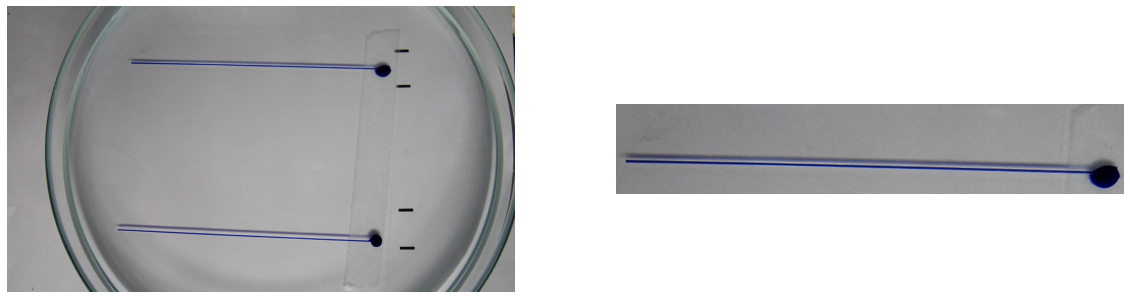

In [50]:
image = mpimg.imread( "image\\10.08.2020 Heptane-water\\frame 2\\12-06-06 PM\\10.08.2020 (2) " + str(1464).zfill(4) + ".jpg" )
crop_image = crop(image, ((100, 800), (450, 460), (0,0)), copy=False)
plot_compare_img(image,crop_image)

In [51]:
number_of_picture = 435
thresh = 45
template2 = []
l_def = 59.21148537234985
#1464-435 = 1029
for i in range(1030):
    if( True) :
        image = mpimg.imread( "image\\10.08.2020 Heptane-water\\frame 2\\12-06-06 PM\\10.08.2020 (2) " + str(number_of_picture + i).zfill(4) + ".jpg" )
        crop_image = crop(image, ((100, 800), (450, 460), (0,0)), copy=False)
        thresh_image = thresholding(thresh,crop_image)
        # plot_compare_img(crop_image,thresh_image)
        # print(i)
        length = find_length(thresh_image,False)
        length = length - l_def
        length = int(length)
        template2.append(length)
        # print(i, length)
        # plt.figure()
        # plt.imshow(thresh_image)

In [52]:
print(template2)
print(len(template2))

[245, 251, 256, 261, 265, 269, 273, 278, 281, 288, 291, 296, 300, 304, 309, 313, 318, 321, 325, 330, 335, 339, 343, 346, 350, 355, 359, 363, 367, 371, 374, 378, 382, 385, 389, 393, 397, 400, 404, 406, 410, 414, 417, 422, 424, 427, 430, 433, 437, 440, 443, 446, 449, 452, 455, 457, 460, 463, 467, 469, 472, 474, 477, 479, 482, 484, 487, 490, 492, 495, 496, 499, 501, 503, 505, 508, 511, 512, 514, 516, 519, 520, 522, 524, 528, 529, 531, 533, 535, 536, 538, 540, 542, 544, 546, 548, 549, 551, 553, 555, 557, 558, 559, 561, 563, 565, 568, 568, 570, 573, 574, 576, 577, 579, 580, 582, 583, 585, 587, 588, 590, 591, 594, 595, 598, 600, 601, 603, 604, 606, 608, 610, 612, 614, 616, 617, 619, 621, 623, 625, 626, 628, 630, 631, 633, 635, 636, 638, 640, 642, 643, 645, 647, 648, 650, 652, 653, 655, 657, 658, 660, 661, 663, 665, 666, 668, 669, 671, 672, 673, 675, 677, 679, 680, 681, 682, 684, 685, 687, 688, 690, 691, 692, 693, 695, 696, 698, 699, 700, 702, 703, 705, 706, 707, 709, 710, 712, 713, 714, 716,

concat 2 template and calculate pixel to centimeter

In [53]:
l_array = np.concatenate((template1,template2), axis=0)
# print(l_array)
# print(type(l_array[1]))
# print(l_array.shape)
l_array = l_array.astype('float32')

#find missing value and set to 0
for i in range(len(l_array)):
    if(l_array[i] < 0 ):
        l_array[i] = 0

for i in range(len(l_array)):
    l_array[i] = pixel_to_cm(l_array[i])

In [54]:
print(l_array)

[0.       0.       0.       ... 8.698113 8.698113 8.698113]


export data to exel

In [55]:
import pandas as pd

In [56]:
print(len(l_array))

1128


In [63]:
data = []
num_img = 337
for i in range(len(l_array)):
    data.append(( " 10.08.2020 (2) " + str(num_img + i).zfill(4)  ,l_array[i] )) 
# print(data)
dataframe = pd.DataFrame(data, 
             columns=['image_name', 
                      'length(cm)'])
# print(dataframe)
# writing to Excel
datatoexcel = pd.ExcelWriter('Heptane-water(2)_10.08.2020_12-06-06-PM.xlsx')
# write DataFrame to excel 
dataframe.to_excel(datatoexcel)
#save the excel
datatoexcel.save()


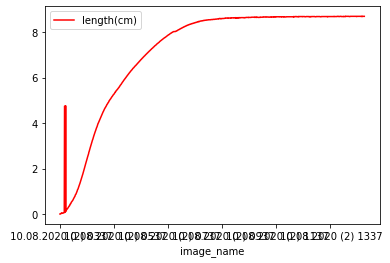

In [64]:
dataframe.plot(kind='line',x='image_name',y='length(cm)',color='red')
plt.show()